# Prática Guiada - Modelagem estatística I.

# Plano de aula 

#### Faremos um ciclo do início ao fim de tudo que aprendemos até aqui nas próximas duas aulas com um mesmo dataset. A primeira aula será concentrada no [EDA](https://www.ibm.com/cloud/learn/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.&text=It%20can%20also%20help%20determine,for%20data%20analysis%20are%20appropriate.). A segunda aula na [modelagem](https://www.ibm.com/garage/method/practices/reason/model-selection-development-ai-data-science/).

# Introdução do caso

<br>
<img src="house_price.png" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA.

    -> Identificar como a base foi construida
    -> Devemos nos preocupar os com outliers?
    -> Ao analisar como as variáveis estão distribuidas, temos funções conhecidas?
    -> Como as funções se correlacionam, os comportamentos são os previstos?
    -> Para estudar a correlação parcial com regressões precisamos mudar a forma dos dados?
    -> Variáveis dummies, quando usa-las
    -> Iterando váriaveis
    -> Gerando predições
    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

# Aula 1 - EDA

#### Importando as bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Leitura dos dados em `'house_pricing.csv'`.

In [2]:
%time 
house_prices = pd.read_csv("house_pricing.csv", 
                           delimiter = ','
                          )
house_prices.head()

Wall time: 0 ns


,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


## EDA

### Planejamento

#### O que fazer para descrever os dados, que tipo de informação você quer obter sobre os dados?

#### Seria bom entender as seguintes informações sobre o dataset:

- Quantidade de linhas, quantidade de colunas.
- Título das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?).
- Tipo dos dados, não apenas se são numéricas ou texto. O que eles são de fato. São numéricos mas deveriam ser categorias ou `datetime`?
- Visão geral dos valores que as variáveis podem assumir.
- Como as variáveis estão distribuídas?

### Análise exploratória inicial.

#### Vamos começar imprimindo a forma de nosso `dataset` e mais algumas informações importantes. 

In [3]:
print(house_prices.shape)

display(house_prices.info(), 
        house_prices.describe().T
       )

(1845, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1845 non-null   int64  
 1   num_bed                   1845 non-null   int64  
 2   num_bath                  1845 non-null   float64
 3   size_house                1845 non-null   int64  
 4   size_lot                  1845 non-null   int64  
 5   num_floors                1845 non-null   float64
 6   is_waterfront             1845 non-null   int64  
 7   condition                 1845 non-null   int64  
 8   size_basement             1845 non-null   int64  
 9   year_built                1845 non-null   int64  
 10  renovation_date           1845 non-null   int64  
 11  zip                       1845 non-null   int64  
 12  latitude                  1845 non-null   float64
 13  longitude                 1845 non-null   float64
 1

None

,count,mean,std,min,25%,50%,75%,max
price,1845.0,557127.039024,403208.183409,81000.000000,325000.000000,457000.000000,665000.000000,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,3.000000,3.000000,4.000000,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.750000,2.250000,2.500000,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,1440.000000,1950.000000,2620.000000,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,5100.000000,7700.000000,11060.000000,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,550.000000,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1952.000000,1976.000000,1997.000000,2.015000e+03


#### Vamos construir um função para realizar a análise exploratória dos dados. Contaremos o número de nulos, descobriremos os tipos e realizaremos contagens e arredondamentos.

In [4]:
def EDA_stats(df):
    df= df.rename(columns = str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.str.lower().tolist()
    
    eda_df['Mean'] = np.round(df.mean(), 
                              2
                             )
    
    eda_df['Median'] = np.round(df.median()
                                , 2
                               )
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), 
                                    colunas
                                   )
                               )

    return eda

#### Chamamos a função `EDA_stats()` aplicada ao dataframe `house_prices`.

In [5]:
EDA_stats(house_prices)

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
price,0,0.0,int64,1845,557127.04,457000.00,7.062500e+06,81000.000000,403208.18,905
num_bed,0,0.0,int64,1845,3.38,3.00,9.000000e+00,0.000000,0.94,10
num_bath,0,0.0,float64,1845,2.14,2.25,6.750000e+00,0.000000,0.79,22
size_house,0,0.0,int64,1845,2128.44,1950.00,1.004000e+04,410.000000,955.75,435
size_lot,0,0.0,int64,1845,15642.50,7700.00,1.024068e+06,649.000000,41323.93,1433
num_floors,0,0.0,float64,1845,1.52,1.50,3.500000e+00,1.000000,0.55,6
is_waterfront,0,0.0,int64,1845,0.01,0.00,1.000000e+00,0.000000,0.12,2
condition,0,0.0,int64,1845,3.38,3.00,5.000000e+00,1.000000,0.63,5
size_basement,0,0.0,int64,1845,290.64,0.00,4.820000e+03,0.000000,462.00,174
year_built,0,0.0,int64,1845,1971.82,1976.00,2.015000e+03,1900.000000,29.10,116


#### Agora plotamos um histograma do dataframe `house_prices`.

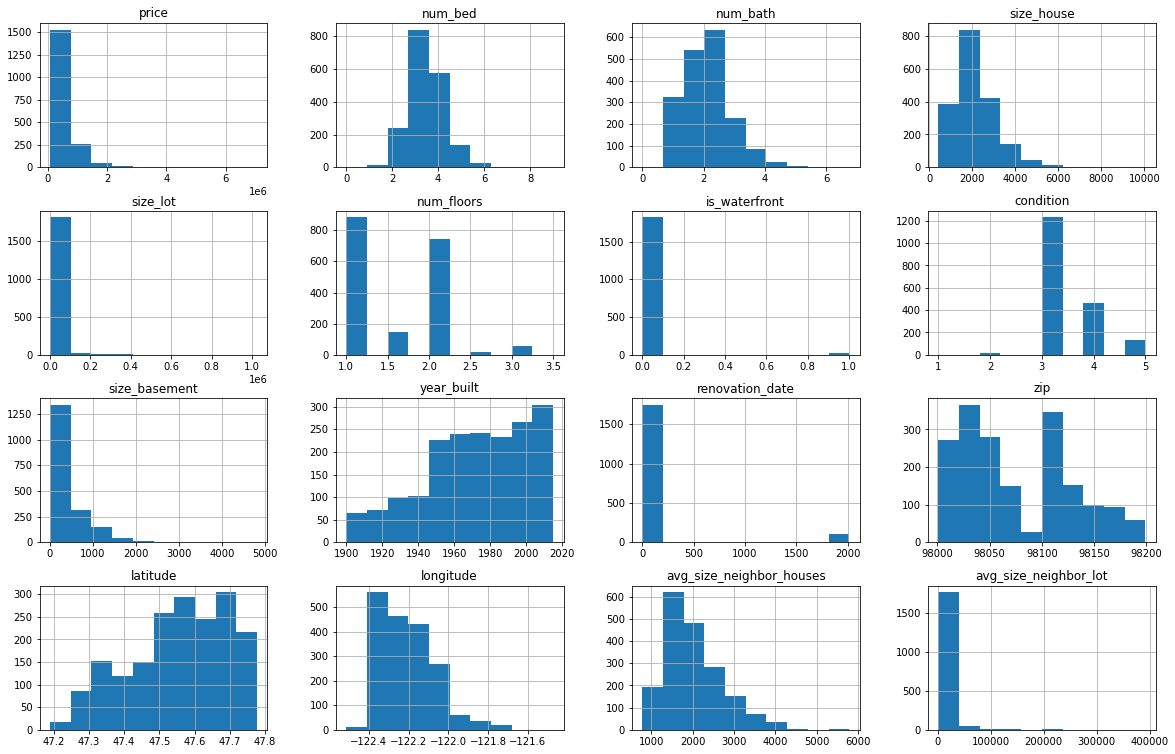

In [6]:
house_prices.hist(figsize = (20,13));

#### Vamos comparar nossa observação dos histogramas com os [gráficos de violino](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d), usando o método [.violinplot(https://seaborn.pydata.org/generated/seaborn.violinplot.html).

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

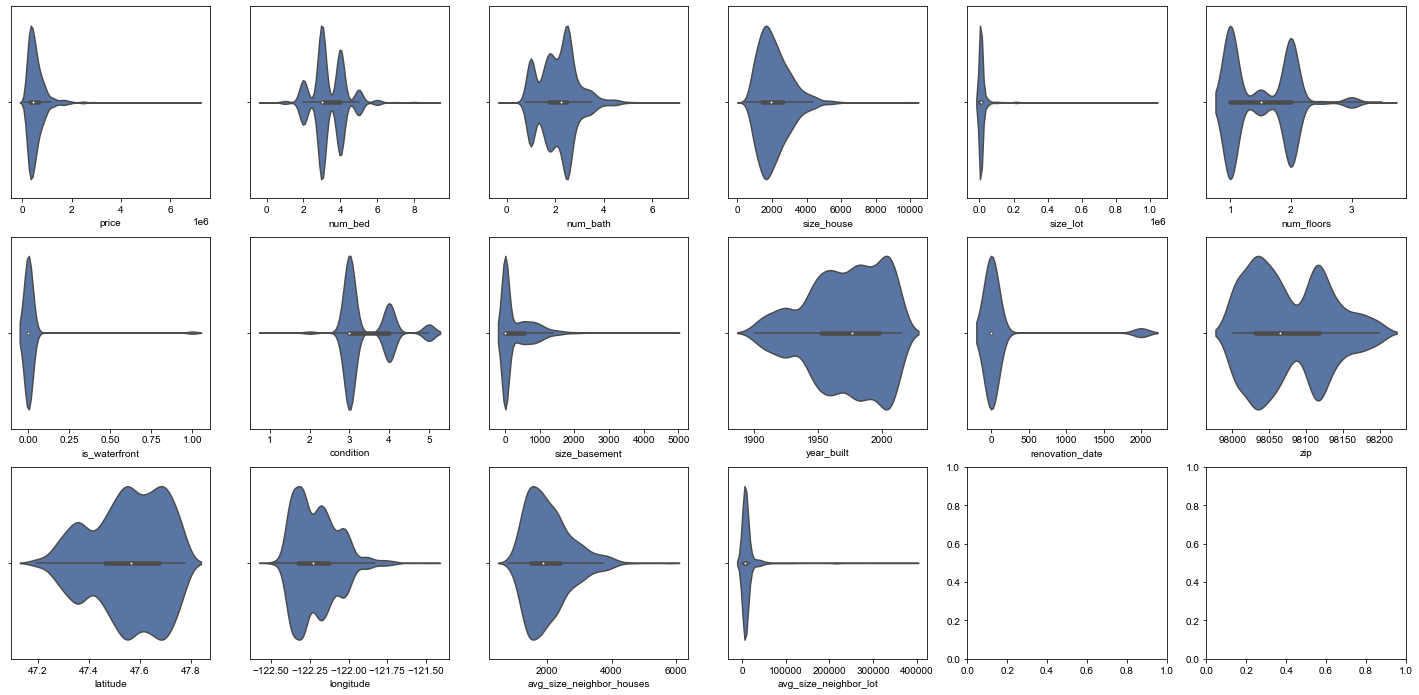

In [7]:
fig, ax = plt.subplots(3, 6, figsize = (25, 12)
                      )
sns.set(font_scale = 1)

for i in range(len(house_prices.columns)):
     sns.violinplot(house_prices.iloc[ : ,  i ], 
                    ax = ax[i // 6, i % 6]
                   )
plt.show()

### Conclusões iniciais.

#### Observando as sumarizações e representaçoes dos dados a que tivemos acesso, que conclusões podemos obter dessas informações?

- `Renovation_date` na verdade é um ano. Como não há informação sobre dia ou mês, será mantido como numérico. 

- Contudo, o valor '0' significa que nunca houve reforma. Tratando-se de um atributo que deveria aumentar o valor do imóvel quanto menor fosse, os '0' não são consistentes com os outros valores. Deveria ser substituído pelo ano em que foi construído?

- Há colunas com valores ordenados e não-ordenados:
  - Ordenadas: `condition`, `num_bed`, `num_bath`
  
  - Não ordenadas: `is_waterfront`, `zip`, ...

- Existem 22 diferentes valores para banheiros. Os valores assumem frações para representar lavabos. Será possível separar em duas variáveis: qtd de banheiros e qtd de lavabos?

- O dataset possui informação de latidude (`latitude`) e longitude (`longitude`), podemos plotar um mapa e verificar aspectos geográficos (ex.: o que significa waterfront - mar, rio, lago, etc).

- Na descrição do `dataset` diz que `size_house` já inclui `size_basement`. Algumas possíveis novas  features:
    - `area_ex_basement`; 
    - `basement_ratio`; 
    - `area_per_floor`; 
    - `baths_bed_ratio`.

- As variáveis estão em escalas bem distintas. Algum tipo de [`scaling`](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) será necessário

- Outliers: 
    - Algumas distribuições estão bastante assimétricas. 
        - São outliers ou existe uma relação não linear dessas variáveis com as outras? 
        - Para as séries com [assimetria](https://blog.ldodds.com/2017/03/24/what-is-data-asymmetry/) à direita (cauda longa para valores maiores), como por exemplo `price`, podemos experimentar a utilização do [log](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37) para corrigir. 
    
    - Poderemos também excluir se houver indícios de que é um erro ou que é um tipo de imóvel muito diferente. 
        - Imóvel sem banheiro ou sem quarto;
        - Imóvel com $100%$ da área em `basement`.

## Reiterando na analise exploratória

#### Vamos escolher uma ou mais pontos das conclusões prévias que tivemos e desenvolver o código. Podemso começar analisando como evoluiu, ao longo dos anos, o preço por medida de área dos imóveis.

In [8]:
house_prices['price_area'] = house_prices['price'] / house_prices['size_house']

#### Vamos fazer uso do método [`.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

In [9]:
house_prices.pivot_table(values = 'size_house', 
                         columns = 'year_built', 
                         aggfunc = 'count'
                        )

year_built,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
size_house,7,3,3,5,4,2,9,4,10,3,...,43,33,36,15,8,7,15,22,55,3


#### Vamos também plotar a evolução de `'size_house'` e `'price_area'` com `'year_built'`. 

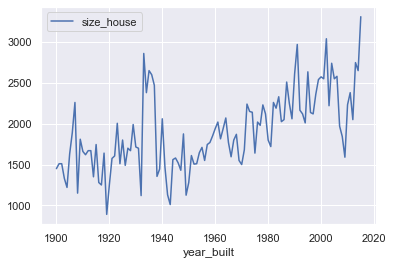

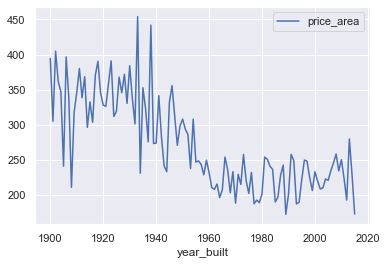

In [10]:
house_prices.pivot_table(values = 'size_house', 
                         columns = 'year_built', 
                         aggfunc = 'median'
                        ).T.plot()

house_prices.pivot_table(values = 'price_area', 
                         columns = 'year_built', 
                         aggfunc = 'median' 
                        ).T.plot();

#### Podemos procurar pelo número de observações em que nunca houve uma reforma.

In [11]:
house_prices.loc[house_prices['renovation_date'] == 0, 
                 'renovation_date'
                ].shape

(1745,)

#### Podemos atualizar os valores para os casos nulos de `'renovation_date'` com os valores de `'year_built'`.

In [12]:
house_prices.loc[house_prices['renovation_date'] == 0, 
                 'renovation_date'
                ] = house_prices.loc[house_prices['renovation_date'] == 0,
                                     'year_built'
                                    ]
house_prices.loc[house_prices['renovation_date'] == 0, 
                 'renovation_date'
                ].shape

(0,)

#### E plotamos então um histograma de 'renovation_date'.

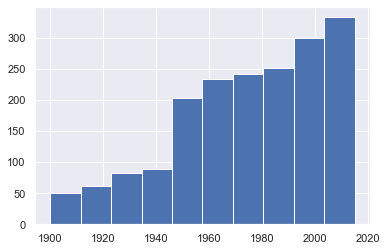

In [13]:
house_prices['renovation_date'].hist();

In [14]:
#house_prices.columns

#### Vamos analisar com mais detalhe a distribuição dos dados, em especial o efeito do preço `'price'` do [aspecto geográfico](https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c) do `dataset`. A informação geográfica de determinado item é uma composição de duas variáveis ([latitude e longitude](https://gsp.humboldt.edu/olm/Lessons/GIS/01%20SphericalCoordinates/Latitude_and_Longitude.html#:~:text=Both%20longitude%20and%20latitude%20are,to%20the%20south%20are%20negative)) que, isoladamente fazem pouco sentido.

#### Usamos o método [`.normaltest()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html), testar se a amostra difere de uma distribuição normal. Esta função testa a hipótese nula de que uma amostra vem de uma distribuição normal. É baseado no teste de D’Agostino e Pearson [1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r7bf2e556f491-1), [2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r7bf2e556f491-2) que combina inclinação e curtose para produzir um teste abrangente de normalidade.

In [15]:
from scipy import stats

def normal(df, col, threshold = 0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        #print('p_value:', p_value)
        #print("stats.normaltest(df['{}']):".format(col), stats.normaltest(df[col]))
        
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal' 
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result



#### A seguir definimos uma função que realiza o cálculo do [intervalo inter quartil](https://www.sciencedirect.com/topics/computer-science/interquartile-range) e detecta os [outliers](A Brief Overview of Outlier Detection Techniques) de um determinada coluna.

In [16]:
def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique()) > 2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5 * iqr_range
            upper = q3 + 1.5 * iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0], 
                                  2
                                 )
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
        
    #print('outliers:', outliers, 'outliers_perc:', outliers_perc)
    return outliers, outliers_perc

#### Por fim, podemos ainda realizar mais um pouco de estatística, contando o númeoro de valores núlos, sua porcentagem em referência ao `dataset`, checando os tipos e realizando contagens.

#### Verificamos também a contagem dos elementos únicos, as médias, mínimos e máximos, o desvio padrão, a contagem de `outliers`

In [17]:
def EDA_morestats(df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    # Outro ponto para ser verificado, porque para criar a coluna com a quantidade de valores unicos por coluna
    # Não utilizei a função df.unique() 
    colunas = df.columns.tolist()
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), 
                                            colunas), 
                                        index = colunas
                                       )
    
    eda_df['Mean'] = df.mean().round(3)
    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['STD'] = df.std().round(3)
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, 
                                                         x
                                                        ), 
                                        colunas), 
                                    index = colunas
                                   )
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], 
                                              colunas
                                             ), 
                                          index = colunas
                                         )
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], 
                                         colunas
                                        ), 
                                     index = colunas
                                    )
    df = pd.DataFrame(eda_df)
    #df.loc[colunas,:].head()
    return df.loc[colunas,:]

#### Vamos chamar as funções que criamos:

In [18]:
#house_prices.columns
normal(house_prices, 
       'num_bath'
      )

'not_normal'

In [19]:
outliers_count_IQR(house_prices, 'num_bath')

(64, 0.03)

In [20]:
EDA_morestats(house_prices)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Min,Max,STD,Normality,Amount_Outliers,%_Outliers
price,0,0.0,int64,1845,905,557127.039,81000.000000,7.062500e+06,403208.183,not_normal,106.0,0.06
num_bed,0,0.0,int64,1845,10,3.380,0.000000,9.000000e+00,0.939,not_normal,51.0,0.03
num_bath,0,0.0,float64,1845,22,2.140,0.000000,6.750000e+00,0.785,not_normal,64.0,0.03
size_house,0,0.0,int64,1845,435,2128.445,410.000000,1.004000e+04,955.754,not_normal,48.0,0.03
size_lot,0,0.0,int64,1845,1433,15642.504,649.000000,1.024068e+06,41323.934,not_normal,225.0,0.12
num_floors,0,0.0,float64,1845,6,1.519,1.000000,3.500000e+00,0.550,not_normal,0.0,0.00
is_waterfront,0,0.0,int64,1845,2,0.014,0.000000,1.000000e+00,0.118,not_normal,NaN,NaN
condition,0,0.0,int64,1845,5,3.382,1.000000,5.000000e+00,0.634,not_normal,2.0,0.00
size_basement,0,0.0,int64,1845,174,290.644,0.000000,4.820000e+03,461.996,not_normal,62.0,0.03
year_built,0,0.0,int64,1845,116,1971.820,1900.000000,2.015000e+03,29.098,not_normal,0.0,0.00


#### Podemos ainda plotar a disperção entre 'longitude' e 'latitude'.

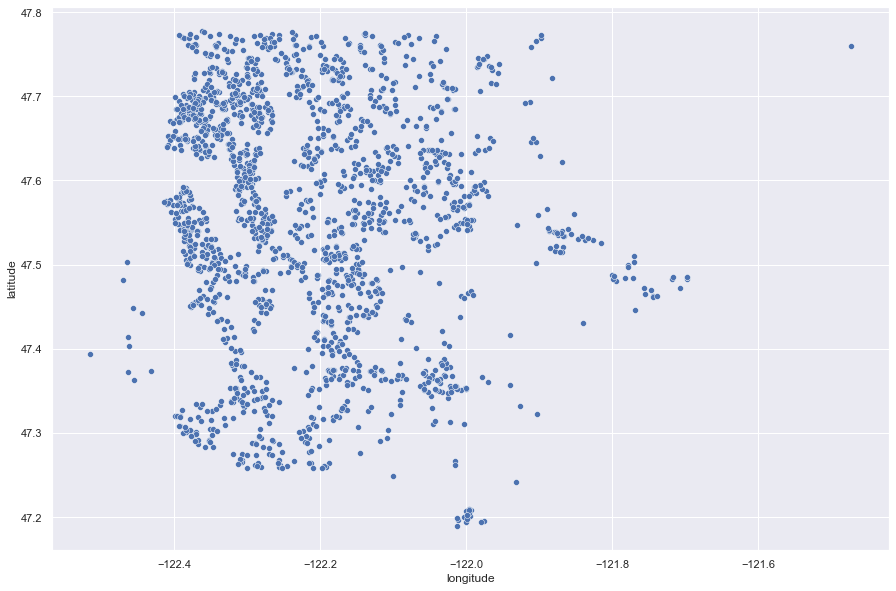

In [21]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = house_prices['longitude'], 
                y = house_prices['latitude']
               )
plt.show()

#### Podemos investigar a distribuição da variável `'price'`, em termos das variáveis `'longitude'` e `'latitude'`.

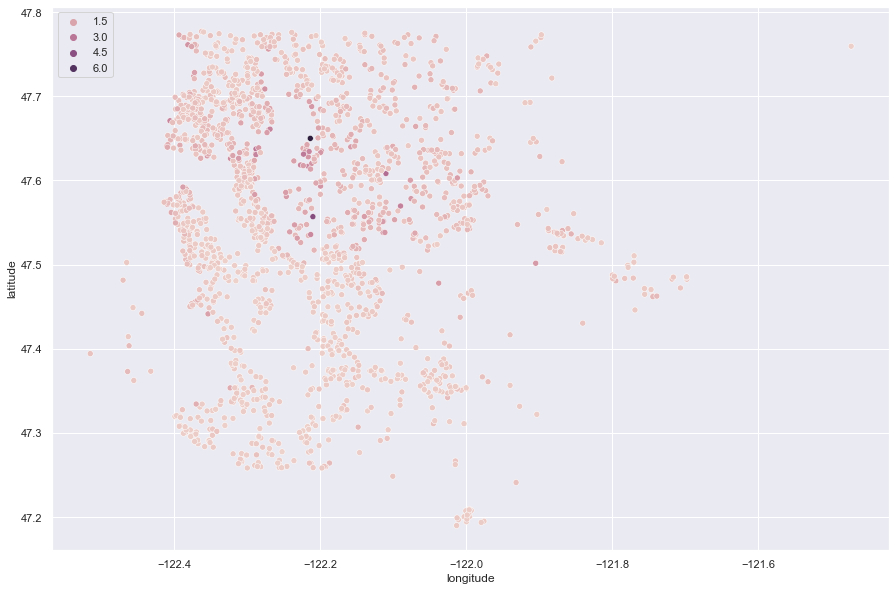

In [22]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = house_prices['longitude'], 
                y = house_prices['latitude'], 
                hue = house_prices['price'].tolist()
               );
plt.show()

#### Como a variável preço tem uma cauda longa à direita, a visualização da distribuição dos preços no mapa fica prejudicada. Podemos estudar como a distribuição dos preços, dada pela variável `'price'` é alterada de assimétrica para simétrica, quando fazemos uso da função [logarítmo](https://towardsdatascience.com/whats-a-logarithm-cca50d031241). 

#### Essa transformação afetaa diretamente o modelo, pois agpra ele passa a prever o logarítmo do preços. Para que a saída da sua previsão seja compreendida de forma monetária, como os dados de entrada, é preciso fazer a transformação inversa (exp).

#### Essa transformação, na prática, introduz uma não lineariedade ao seu modelo e às relações entre as variáveis. Ou seja, as variáveis que influenciam o preço da casa irão influenciar em escala exponencial.

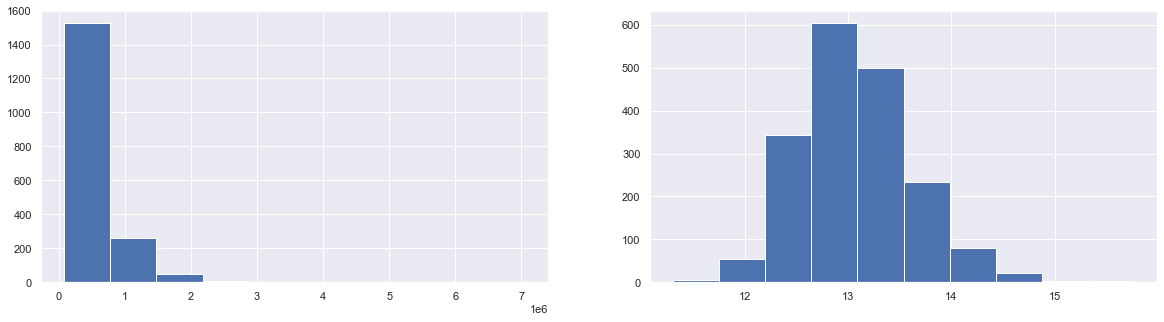

In [23]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.hist(house_prices['price'])
plt.subplot(122)
plt.hist(np.log(house_prices['price']))
plt.show()

#### A seguir plotamos a comparação entre as distribuições de `'price'` e $log$(`'price'`), em termos da `longitude` e da `latitude`.

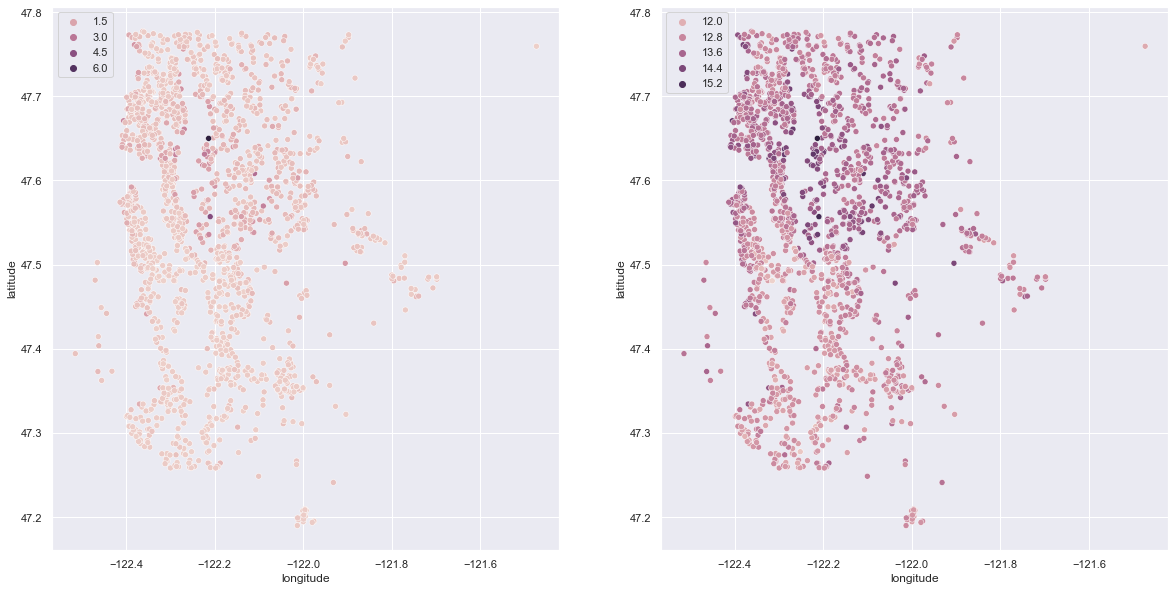

In [24]:

fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.scatterplot(x = house_prices['longitude'], 
                y = house_prices['latitude'], 
                hue = house_prices['price'].tolist(), 
                ax=ax[0]
               )
sns.scatterplot(x = house_prices['longitude'], 
                y = house_prices['latitude'], 
                hue = np.log(house_prices['price'].tolist()), 
                ax = ax[1]
               )
plt.show()

#### Vamos então criar uma coluna `'price_log'`.

In [25]:
house_prices['price_log'] = np.log(house_prices['price'])
house_prices['price_log']

0       12.384219
1       14.046622
2       12.934828
3       12.439167
4       12.871335
          ...    
1840    11.747998
1841    13.142166
1842    13.140203
1843    12.577636
1844    12.727541
Name: price_log, Length: 1845, dtype: float64

#### Geograficamente falando, parece haver [`outliers`](). Regiões distantes com baixo volume de casos seriam P(longitude, latitude) = $(\approx -121.5, \approx 47.75)$ ou P(longitude, latitude) = $(\approx 122.0, \approx 47.2)$.

#### Podemos remover os dados de regiões com poucos dados, definindo limites de logitude e latitude. Depois checamos a fração removida do `dataset` total.

In [26]:
long_thrs = -121.6
lat_thrs = 47.25
#long_thrs = -121.5
#lat_thrs = 47.75

house_prices_selected = house_prices.loc[(house_prices['longitude'] < long_thrs) & (house_prices['latitude'] > lat_thrs) ,:] 

print("Outliers dropped:", house_prices.shape[0] - house_prices_selected.shape[0])

print("Outliers %:", 100 * round((house_prices.shape[0] - house_prices_selected.shape[0]) / house_prices.shape[0], 2))

Outliers dropped: 18
Outliers %: 1.0


#### Agora plotamos a diferença entre os logarítmos dos preços, em termos das coordenadas, desconsiderando os valores descartados.

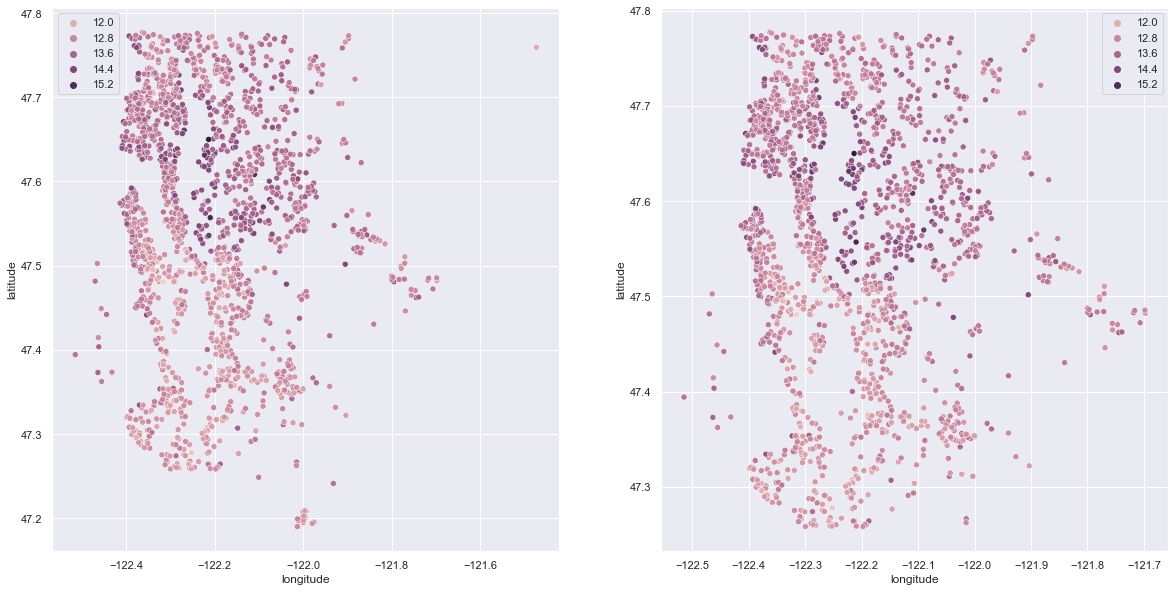

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(x = house_prices['longitude'], 
                y = house_prices['latitude'], 
                hue = np.log(house_prices['price'].tolist()), 
                ax = ax[0]
               )
sns.scatterplot(x = house_prices_selected['longitude'], 
                y = house_prices_selected['latitude'], 
                hue = np.log(house_prices_selected['price'].tolist()), 
                ax = ax[1]
               )
plt.show()

#### Vamos importar a biblioteca [folium](https://python-visualization.github.io/folium/) torna mais fácil visualizar dados que foram manipulados em Python em um mapa interativo. O [`heatmap`](https://towardsdatascience.com/tagged/heatmap) pode ser obtido com o plugin [folium.plugins](https://python-visualization.github.io/folium/plugins.html).

In [28]:
# conda install folium
import folium
from folium.plugins import HeatMap
import json

m = folium.Map(location = [house_prices.latitude.mean(), 
                           house_prices.longitude.mean()
                          ]
              )
folium.GeoJson('zipcode_king_county.geojson', 
               name = 'geojson'
              ).add_to(m)
HeatMap(data = house_prices[['latitude', 
                             'longitude', 
                             'price_log'
                            ]
                           ].groupby(['latitude', 
                                      'longitude'
                                     ]
                                    ).mean().reset_index().values.tolist(), 
        radius = 9, 
        max_zoom = 13
       ).add_to(m)
m

ModuleNotFoundError: No module named 'folium'

#### A quantidade de casas que não contidas no [`geojson`](https://en.wikipedia.org/wiki/GeoJSON).

In [29]:
house_prices.loc[house_prices.zip == '98033', 'zip'].shape[0]

0

#### Usamos o método [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para coletar os códigos `zip` do `dataset`.

#### Carregamos o arquivo [Geojson](https://geojson.org/) `zipcode_king_county.geojson` em um objeto e inicializamos um objeto com o método [`folium.Map()`](https://python-visualization.github.io/folium/quickstart.html) e criamos um [mapa coroplético](https://en.wikipedia.org/wiki/Choropleth_map#:~:text=A%20choropleth%20map%20(from%20Greek,each%20area%2C%20such%20as%20population) com os preços médios por região. 

In [30]:
zipcode_data = house_prices.groupby('zip').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)

# load my geojson file which contains my Polygons
boundary_file = "zipcode_king_county.geojson"
with open(boundary_file, 'r') as f:
    zipcode_boundary = json.load(f)

# Initialize Folium Map again (same as before)
m1 = folium.Map(location = [house_prices['latitude'].mean(), 
                            house_prices['longitude'].mean()], 
                zoom_start = 10
               )

# Create choropleth map  
folium.Choropleth(
    geo_data = zipcode_boundary,
    name = 'choropleth',
    data = zipcode_data,
    columns = ['zip', 'price_area'],
    key_on = 'feature.properties.ZCTA5CE10',
    fill_color = 'Spectral',
    fill_opacity = 0.6,
    nan_fill_opacity = 0,
    line_opacity = 1,
    legend_name = 'Mean Price'
).add_to(m1)

m1

NameError: name 'json' is not defined

#### É possível estudar a [visualização de mapas com Folium Maps](https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2) lendo o [notebook](https://github.com/lindsallen/mapping/blob/master/dc_restaurants/dc_choropleth_wtooltip.ipynb) disponível. 

#### Criamos a variável `'years_since_renovation'` e plotamos seu histograma.

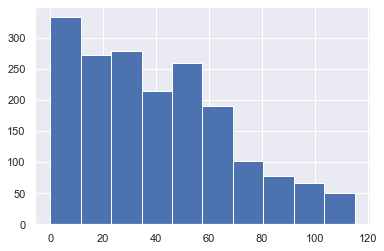

In [31]:
house_prices["years_since_renovation"] = house_prices["year_built"].max() - house_prices["renovation_date"] 
house_prices.years_since_renovation.hist();

#### Também podemos observar o nível de envelhecimento das casas do `dataset`.

<AxesSubplot:>

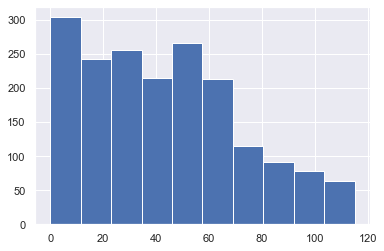

In [32]:
house_prices['age'] = house_prices['year_built'].max() - house_prices['year_built']
house_prices.age.hist()

#### Além disso podemos criar uma coluna `zip_group` para códigos de área da mesma região.

In [33]:
house_prices['zip_group'] = house_prices['zip'].astype(str).str[:4]
house_prices['zip_group'].value_counts()

9800    217
9805    214
9811    207
9803    190
9802    152
9810    139
9807    125
9812     90
9804     90
9814     72
9813     62
9801     54
9816     48
9817     47
9819     43
9809     27
9815     27
9806     25
9818     16
Name: zip_group, dtype: int64

#### Como cientista de dados você deverá avaliar em que medida irá continuar explorando suas dúvidas e ideias sobre os dados ou avançar para outros tópicos. Uma boa prática é manter certo controle sobre as ideias/possíveis caminhos e conclusões como fizemos nos exercícios acima.

#### Iremos seguir para outras fases do processo para explorar mais dimensões do problema ao invés de detalhar as conclusões ou dúvidas levantadas na fase anterior.

#### Um dimensão relevante para olhar na análise exploratória é a correlação entre as variáveis.